<a href="https://colab.research.google.com/github/Metsashka/-3-/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузите файл «vgsales_1.csv» в объект DataFrame, рассчитайте необходимые
показатели и визуализируйте информацию, используя различные
инструменты pandas. Проанализируйте полученные графики и сделайте
выводы.
1. Игры каких жанров были наиболее популярны до 2000 года, а какие после?
Оцените популярность жанров по количеству выпущенных игр и по
объему продаж по всему миру. Для визуализации полученных результатов
используйте столбиковые диаграммы.
Замечание. Одна и та же игра может встречаться в выборке несколько раз, т.к.
она может быть выпущена на нескольких платформах.
2. Отобразите на графике общее число видеоигр, выпущенных в каждом
году.
3. Определите трех издателей, выпустивших наибольшее количество
видеоигр. Изобразите количество выпущенных издателями видеоигр для
каждой платформы на столбиковой диаграмме (можно использовать
диаграмму с накоплением).
4. Отобразите на круговых диаграммах доли суммарного объема продаж с
1980г. до 2000г. и с 2000г. до 2020г. в Северной Америке, Европе, Японии
от объема продаж по всему миру.


In [10]:
# Поключение библиотек
import pandas as pd
import numpy as np

In [11]:
# Загрузка файла
df = pd.read_csv("vgsale_1.csv")
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
# Проверка на пустоту файла
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [13]:
# Удаление дубликатов
df_nd = df.drop_duplicates(subset=['Name', 'Year'])

До 2000:
Sports          321
Action          221
Racing          184
Role-Playing    181
Fighting        181
Shooter         164
Platform        155
Misc            124
Strategy        121
Adventure        96
Simulation       88
Puzzle           87
Name: Genre, dtype: int64


<Axes: >

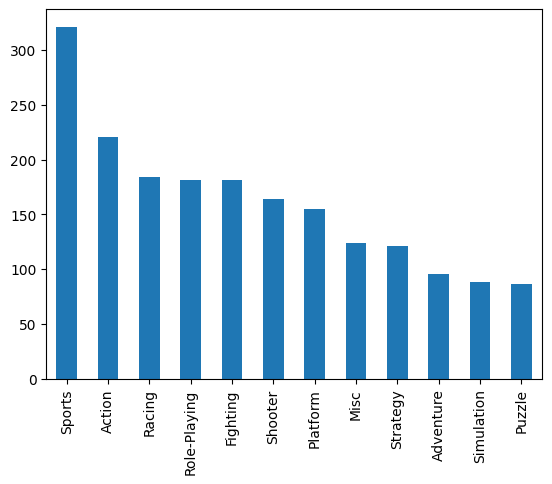

In [14]:
# Показ игр до 2000 года
print("До 2000:")
print(df_nd[df_nd['Year'] < 2000]['Genre'].value_counts())
df_nd[df_nd['Year'] < 2000]['Genre'].value_counts().plot.bar()

После 2000:
Action          1817
Misc            1257
Role-Playing    1137
Sports          1125
Adventure        999
Shooter          709
Simulation       666
Racing           648
Strategy         481
Platform         469
Fighting         468
Puzzle           431
Name: Genre, dtype: int64


<Axes: >

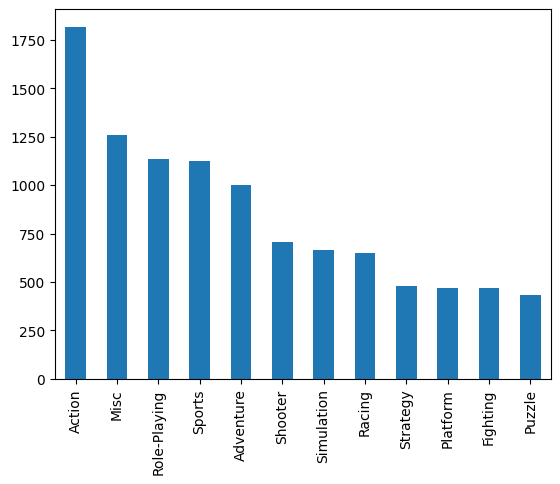

In [15]:
# Показ игр после 2000 года
print("После 2000:")
print(df_nd[df_nd['Year'] >= 2000]['Genre'].value_counts())
df_nd[df_nd['Year'] >= 2000]['Genre'].value_counts().plot.bar()

До 2000:
Genre
Platform        331.18
Role-Playing    199.77
Action          190.47
Sports          178.85
Racing          162.50
Fighting        130.69
Shooter         128.74
Puzzle          101.72
Misc             71.99
Strategy         57.43
Simulation       52.56
Adventure        49.59
Name: Global_Sales, dtype: float64


<Axes: xlabel='Genre'>

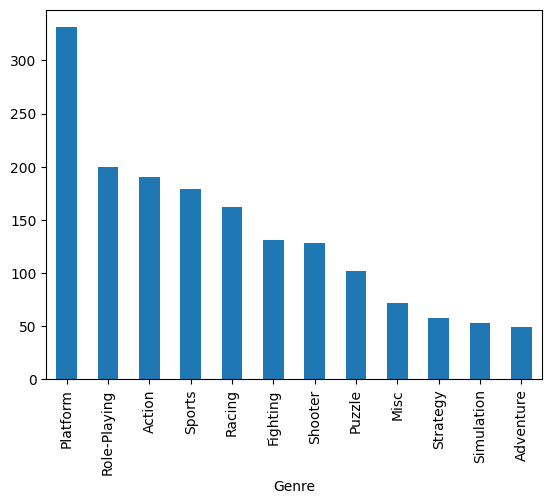

In [16]:
# По объему продаж
df_2 = df[df['Year'] < 2000]
s = df_2.groupby('Genre')['Global_Sales'].sum()

print('До 2000:')
print(s.sort_values(ascending=False))

s.sort_values(ascending=False).plot.bar()

После 2000:
Genre
Action          1532.41
Sports          1130.39
Shooter          897.46
Misc             725.63
Role-Playing     724.07
Racing           564.27
Platform         497.97
Simulation       337.60
Fighting         313.36
Adventure        185.21
Puzzle           140.50
Strategy         116.00
Name: Global_Sales, dtype: float64


<Axes: xlabel='Genre'>

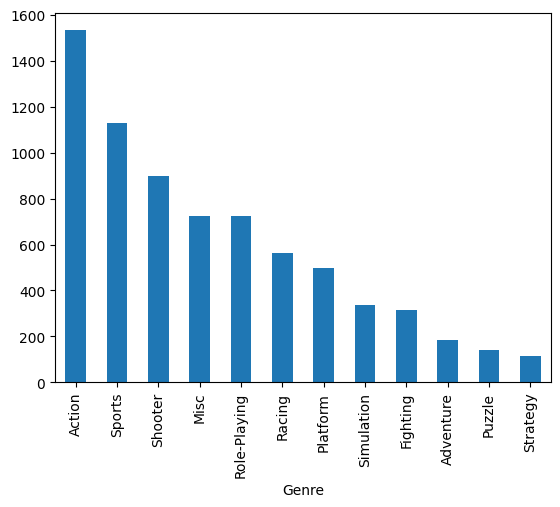

In [17]:
# По объему продаж
df_2 = df[df['Year'] >= 2000]
s = df_2.groupby('Genre')['Global_Sales'].sum()

print('После 2000:')
print(s.sort_values(ascending=False))

s.sort_values(ascending=False).plot.bar()

Количство выпущенных игр:
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64


<Axes: >

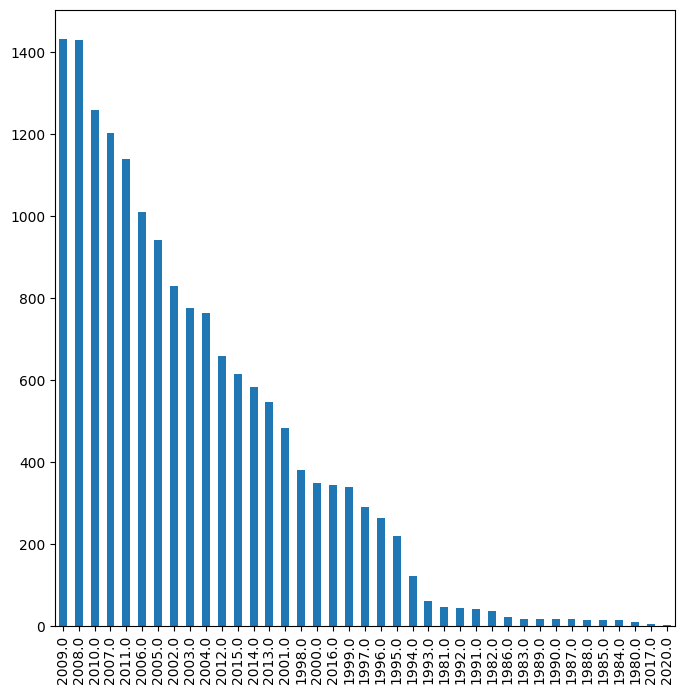

In [18]:
# Отобразите на графике общее число видеоигр, выпущенных в каждом году

df_sum = df['Year'].value_counts()

print('Количство выпущенных игр:')
print(df_sum.sort_values(ascending=False))

df_sum.sort_values(ascending=False).plot.bar(figsize = (8,8))

<Axes: xlabel='Platform'>

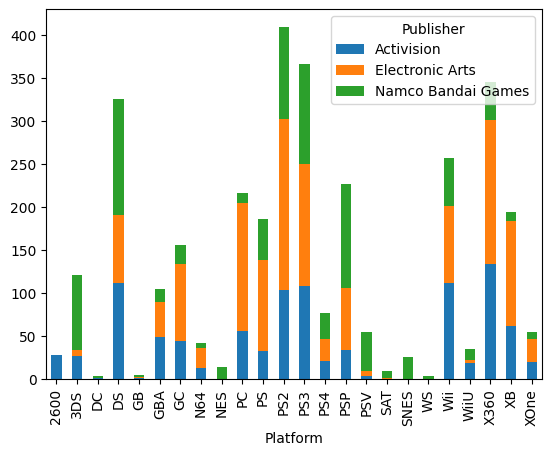

In [19]:
# Определите трех издателей, выпустивших наибольшее количество видеоигр
dtop = df['Publisher'].value_counts()[:3]
dd = df[df['Publisher'].isin(dtop.index.tolist())]
pd.crosstab(dd['Platform'], dd['Publisher']).plot.bar(stacked=True)

4. Отобразите на круговых диаграммах доли суммарного объема продаж с
1980г. до 2000г. и с 2000г. до 2020г. в Северной Америке, Европе, Японии
от объема продаж по всему миру.

<Axes: >

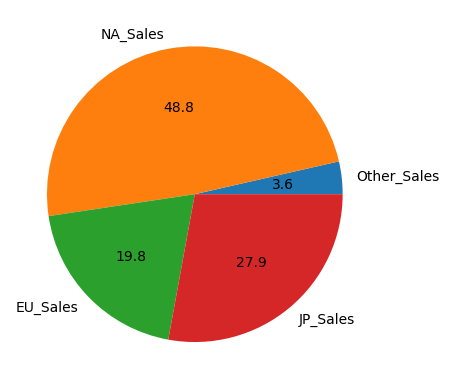

In [20]:
# С 1980 по 2000
df[(df['Year'] >= 1980) & (df['Year'] <= 2000)][['Other_Sales','NA_Sales','EU_Sales','JP_Sales']].sum().plot.pie(autopct='%.1f')

<Axes: >

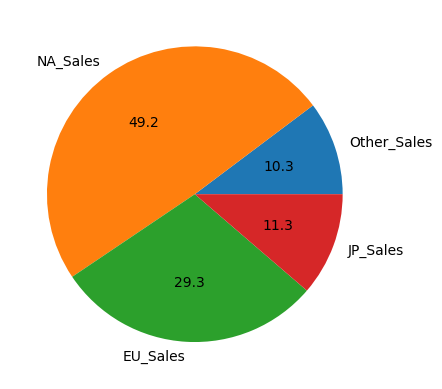

In [21]:
# С 2000 по 2020
df[(df['Year'] >= 2000)][['Other_Sales','NA_Sales','EU_Sales','JP_Sales']].sum().plot.pie(autopct='%.1f')